# Question 4.2

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import math
from sklearn.utils import shuffle
from sklearn.svm import SVC
from random import randint
from sklearn.model_selection import KFold, cross_validate, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from collections import OrderedDict

In [2]:
#Headers sets names for all of the attributes contained in the data set
headers = ["a1",
           "a2",
           "a3",
           "a4",
           "a5",
           "a6",
           "a7",
           "a8",
           "a9",
           "a10",
           "a11",
           "a12",
           "a13",
           "a14",
           "a15",
           "a16",
           "a17",
           "a18",
           "a19",
           "a20",
           "a21",
           "a22",
           "a23",
           "a24",
           "a25",
           "a26",
           "a27",
           "a28",
           "a29",
           "a30",
           "a31",
           "a32",
           "a33",
           "a34",
           "label"]
                
#Data is read into pandas dataframe
data = pd.read_csv("ionosphere.csv", names = headers)
data = data.reset_index(drop=True)

#Transform the labels into binary values
def binarize(val):
    if val == 'g':
        return 1
    else:
        return 0
data['label'] = data['label'].map(binarize)

data.head(5)

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,...,a26,a27,a28,a29,a30,a31,a32,a33,a34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1



# SVM Kernels
## Train and Test on Same Data

### Linear

In [26]:
data.shape[1]-1

34

In [3]:
#Create rbf SVM Classifier with deafault values
svm = l_svm = SVC(kernel='linear')

#Initialize a series of Ordered Dictionaries to store scores
l_c=OrderedDict()
l_gamma=OrderedDict()
l_degree=OrderedDict()

#Work through c-values
for key in np.geomspace(0.01,1000,num=100):
    svm.set_params(C=key)
        
    svm.fit(data.iloc[:,:34], data["label"])
    l_c[key] = svm.score(data.iloc[:,:34], data["label"])
    
    #scores = cross_val_score(svm, data.iloc[:,:34], data["label"], cv=10)
    #l_c[key]=np.average(scores)
    
#Reset C to default
svm.set_params(C=1)

for key in range(1,100):
    svm.set_params(degree=key)
        
    svm.fit(data.iloc[:,:34], data["label"])
    l_degree[key] = svm.score(data.iloc[:,:34], data["label"])
    
    #scores = cross_val_score(svm, data.iloc[:,:34], data["label"], cv=10)
    #l_degree[key]=np.average(scores)
    
#Reset degree to default
svm.set_params(degree=3)    
    
for key in np.geomspace(0.01,100,num=100):
    svm.set_params(gamma=key)
        
    svm.fit(data.iloc[:,:34], data["label"])
    l_gamma[key] = svm.score(data.iloc[:,:34], data["label"])
    
    #scores = cross_val_score(svm, data.iloc[:,:34], data["label"], cv=10)
    #l_gamma[key]=np.average(scores)


### Polynomial

In [4]:
#Create rbf SVM Classifier with deafault values
svm = SVC(kernel='poly', gamma='scale')

#Initialize a series of Ordered Dictionaries to store scores
p_c=OrderedDict()
p_gamma=OrderedDict()
p_degree=OrderedDict()

for key in np.geomspace(0.01,1000,num=100):
    svm.set_params(C=key)
        
    svm.fit(data.iloc[:,:34], data["label"])
    p_c[key] = svm.score(data.iloc[:,:34], data["label"])
    
    #scores = cross_val_score(svm, data.iloc[:,:34], data["label"], cv=10)
    #p_c[key]=np.average(scores)

#Reset C to default
svm.set_params(C=1)
    
for key in range(1,100):
    svm.set_params(degree=key)
        
    svm.fit(data.iloc[:,:34], data["label"])
    p_degree[key] = svm.score(data.iloc[:,:34], data["label"])
    
    #scores = cross_val_score(svm, data.iloc[:,:34], data["label"], cv=10)
    #p_degree[key]=np.average(scores)
    
#Reset degree to default
svm.set_params(degree=3)    
    
for key in np.geomspace(0.01,100,num=100):
    svm.set_params(gamma=key)
        
    svm.fit(data.iloc[:,:34], data["label"])
    p_gamma[key] = svm.score(data.iloc[:,:34], data["label"])
    
    #scores = cross_val_score(svm, data.iloc[:,:34], data["label"], cv=10)
    #p_gamma[key]=np.average(scores)



### Radial Basis

In [5]:
#Create rbf SVM Classifier with deafault values
svm = SVC(kernel='rbf', gamma='scale')

#Initialize a series of Ordered Dictionaries to store scores
r_c=OrderedDict()
r_gamma=OrderedDict()
r_degree=OrderedDict()

for key in np.geomspace(0.01,1000,num=100):
    svm.set_params(C=key)
    
    svm.fit(data.iloc[:,:34], data["label"])
    r_c[key] = svm.score(data.iloc[:,:34], data["label"])
    
    #scores = cross_val_score(svm, data.iloc[:,:34], data["label"], cv=10)
    #r_c[key]=np.average(scores)

#Reset C to default
svm.set_params(C=1)
    
for key in range(1,100):
    svm.set_params(degree=key)
        
    svm.fit(data.iloc[:,:34], data["label"])
    r_degree[key] = svm.score(data.iloc[:,:34], data["label"])
    
    #scores = cross_val_score(svm, data.iloc[:,:34], data["label"], cv=10)
    #r_degree[key]=np.average(scores)
    
#Reset degree to default
svm.set_params(degree=3)    
    
for key in np.geomspace(0.01,100,num=100):
    svm.set_params(gamma=key)
        
    svm.fit(data.iloc[:,:34], data["label"])
    r_gamma[key] = svm.score(data.iloc[:,:34], data["label"])
    
    #scores = cross_val_score(svm, data.iloc[:,:34], data["label"], cv=10)
    #r_gamma[key]=np.average(scores)


In [6]:
#Combine data into dataframe
c_data = pd.DataFrame.from_dict([l_c,p_c,r_c],).set_index([['Linear','Polynomial','Radial']])
c_data

,0.01,0.0112332403298,0.0126185688307,0.0141747416293,0.0159228279334,0.0178864952906,0.0200923300257,0.0225701971963,0.0253536449397,0.0284803586844,...,351.119173422,394.420605944,443.062145758,497.702356433,559.081018251,628.029144183,705.480231072,792.482898354,890.215085445,1000.0
Linear,0.868946,0.874644,0.874644,0.874644,0.877493,0.877493,0.880342,0.886040,0.886040,0.883191,...,0.945869,0.945869,0.945869,0.945869,0.945869,0.945869,0.945869,0.948718,0.948718,0.948718
Polynomial,0.641026,0.641026,0.641026,0.641026,0.641026,0.641026,0.641026,0.641026,0.641026,0.641026,...,0.985755,0.985755,0.988604,0.988604,0.988604,0.988604,0.988604,0.988604,0.988604,0.988604
Radial,0.641026,0.641026,0.641026,0.641026,0.641026,0.641026,0.641026,0.641026,0.641026,0.641026,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
#Combine data into dataframe
gamma_data = pd.DataFrame.from_dict([l_gamma,p_gamma,r_gamma]).set_index([['Linear','Polynomial','Radial']])
gamma_data

,0.01,0.0109749876549,0.0120450354026,0.0132194114847,0.014508287785,0.0159228279334,0.0174752840001,0.0191791026167,0.0210490414451,0.0231012970008,...,43.2876128108,47.508101621,52.14008288,57.2236765935,62.8029144183,68.9261210435,75.6463327555,83.0217568132,91.1162756115,100.0
Linear,0.923077,0.923077,0.923077,0.923077,0.923077,0.923077,0.923077,0.923077,0.923077,0.923077,...,0.923077,0.923077,0.923077,0.923077,0.923077,0.923077,0.923077,0.923077,0.923077,0.923077
Polynomial,0.641026,0.641026,0.641026,0.641026,0.641026,0.641026,0.641026,0.641026,0.641026,0.641026,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Radial,0.900285,0.908832,0.917379,0.923077,0.920228,0.923077,0.928775,0.937322,0.940171,0.943020,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
#Combine data into dataframe
degree_data = pd.DataFrame.from_dict([l_degree,p_degree,r_degree]).set_index([['Linear','Polynomial','Radial']])
degree_data

,1,2,3,4,5,6,7,8,9,10,...,90,91,92,93,94,95,96,97,98,99
Linear,0.923077,0.923077,0.923077,0.923077,0.923077,0.923077,0.923077,0.923077,0.923077,0.923077,...,0.923077,0.923077,0.923077,0.923077,0.923077,0.923077,0.923077,0.923077,0.923077,0.923077
Polynomial,0.891738,0.934473,0.920228,0.823362,0.786325,0.769231,0.766382,0.763533,0.763533,0.763533,...,0.763533,0.763533,0.763533,0.763533,0.763533,0.763533,0.763533,0.763533,0.763533,0.763533
Radial,0.954416,0.954416,0.954416,0.954416,0.954416,0.954416,0.954416,0.954416,0.954416,0.954416,...,0.954416,0.954416,0.954416,0.954416,0.954416,0.954416,0.954416,0.954416,0.954416,0.954416


In [9]:
results = c_data.T

#Plot the results
plot = results.plot.line(title='Training SVM Kernal Performance Over Varying C Values')
plot.set_xlabel("C")
plot.set_ylabel("Accuracy")
plot.set_xscale("log")
#Display plot in Jupyter
plot
fig = plot.get_figure()
fig.savefig("Q4_c_t.pdf")

results = degree_data.T
#Plot the results
plot = results.plot.line(title='Training SVM Kernal Performance Over Varying Degree Values')
plot.set_xlabel("Degree")
plot.set_ylabel("Accuracy")
plot.set_xscale("log")
#Display plot in Jupyter
plot
fig = plot.get_figure()
fig.savefig("Q4_degree_t.pdf")

results = gamma_data.T
#Plot the results
plot = results.plot.line(title='Training SVM Kernal Performance Over Varying Gamma Values')
plot.set_xlabel("Gamma")
plot.set_ylabel("Accuracy")
plot.set_xscale("log")
#Display plot in Jupyter
plot
fig = plot.get_figure()
fig.savefig("Q4_gamma_t.pdf")

## 10-Fold Validation
### Linear

In [10]:
#Create rbf SVM Classifier with deafault values
svm = l_svm = SVC(kernel='linear')

#Initialize a series of Ordered Dictionaries to store scores
l_c=OrderedDict()
l_gamma=OrderedDict()
l_degree=OrderedDict()

#Work through c-values
for key in np.geomspace(0.01,1000,num=100):
    svm.set_params(C=key)
        
    #svm.fit(data.iloc[:,:34], data["label"])
    #l_c[key] = svm.score(data.iloc[:,:34], data["label"])
    
    scores = cross_val_score(svm, data.iloc[:,:34], data["label"], cv=10)
    l_c[key]=np.average(scores)
    
#Reset C to default
svm.set_params(C=1)

for key in range(1,100):
    svm.set_params(degree=key)
        
    #svm.fit(data.iloc[:,:34], data["label"])
    #l_degree[key] = svm.score(data.iloc[:,:34], data["label"])
    
    scores = cross_val_score(svm, data.iloc[:,:34], data["label"], cv=10)
    l_degree[key]=np.average(scores)
    
#Reset degree to default
svm.set_params(degree=3)    
    
for key in np.geomspace(0.01,100,num=100):
    svm.set_params(gamma=key)
        
    #svm.fit(data.iloc[:,:34], data["label"])
    #l_gamma[key] = svm.score(data.iloc[:,:34], data["label"])
    
    scores = cross_val_score(svm, data.iloc[:,:34], data["label"], cv=10)
    l_gamma[key]=np.average(scores)



### Polynomial

In [11]:
#Create rbf SVM Classifier with deafault values
svm = SVC(kernel='poly', gamma='scale')

#Initialize a series of Ordered Dictionaries to store scores
p_c=OrderedDict()
p_gamma=OrderedDict()
p_degree=OrderedDict()

for key in np.geomspace(0.01,1000,num=100):
    svm.set_params(C=key)
        
    #svm.fit(data.iloc[:,:34], data["label"])
    #p_c[key] = svm.score(data.iloc[:,:34], data["label"])
    
    scores = cross_val_score(svm, data.iloc[:,:34], data["label"], cv=10)
    p_c[key]=np.average(scores)

#Reset C to default
svm.set_params(C=1)
    
for key in range(1,100):
    svm.set_params(degree=key)
        
    #svm.fit(data.iloc[:,:34], data["label"])
    #p_degree[key] = svm.score(data.iloc[:,:34], data["label"])
    
    scores = cross_val_score(svm, data.iloc[:,:34], data["label"], cv=10)
    p_degree[key]=np.average(scores)
    
#Reset degree to default
svm.set_params(degree=3)    
    
for key in np.geomspace(0.01,100,num=100):
    svm.set_params(gamma=key)
        
    #svm.fit(data.iloc[:,:34], data["label"])
    #p_gamma[key] = svm.score(data.iloc[:,:34], data["label"])
    
    scores = cross_val_score(svm, data.iloc[:,:34], data["label"], cv=10)
    p_gamma[key]=np.average(scores)


### Radial Basis

In [12]:
#Create rbf SVM Classifier with deafault values
svm = SVC(kernel='rbf', gamma='scale')

#Initialize a series of Ordered Dictionaries to store scores
r_c=OrderedDict()
r_gamma=OrderedDict()
r_degree=OrderedDict()

for key in np.geomspace(0.01,1000,num=100):
    svm.set_params(C=key)
    
    #svm.fit(data.iloc[:,:34], data["label"])
    #r_c[key] = svm.score(data.iloc[:,:34], data["label"])
    
    scores = cross_val_score(svm, data.iloc[:,:34], data["label"], cv=10)
    r_c[key]=np.average(scores)

#Reset C to default
svm.set_params(C=1)
    
for key in range(1,100):
    svm.set_params(degree=key)
        
    #svm.fit(data.iloc[:,:34], data["label"])
    #r_degree[key] = svm.score(data.iloc[:,:34], data["label"])
    
    scores = cross_val_score(svm, data.iloc[:,:34], data["label"], cv=10)
    r_degree[key]=np.average(scores)
    
#Reset degree to default
svm.set_params(degree=3)    
    
for key in np.geomspace(0.01,100,num=100):
    svm.set_params(gamma=key)
        
    #svm.fit(data.iloc[:,:34], data["label"])
    #r_gamma[key] = svm.score(data.iloc[:,:34], data["label"])
    
    scores = cross_val_score(svm, data.iloc[:,:34], data["label"], cv=10)
    r_gamma[key]=np.average(scores)

In [13]:
#Combine data into dataframe
c_data = pd.DataFrame.from_dict([l_c,p_c,r_c],).set_index([['Linear','Polynomial','Radial']])
c_data

,0.01,0.0112332403298,0.0126185688307,0.0141747416293,0.0159228279334,0.0178864952906,0.0200923300257,0.0225701971963,0.0253536449397,0.0284803586844,...,351.119173422,394.420605944,443.062145758,497.702356433,559.081018251,628.029144183,705.480231072,792.482898354,890.215085445,1000.0
Linear,0.844374,0.852871,0.852871,0.850093,0.850257,0.850257,0.847479,0.847479,0.850093,0.852951,...,0.878683,0.881625,0.884402,0.884402,0.884402,0.884402,0.884402,0.884402,0.884402,0.887260
Polynomial,0.641125,0.641125,0.641125,0.641125,0.641125,0.641125,0.641125,0.641125,0.641125,0.641125,...,0.907115,0.907115,0.907115,0.907115,0.904337,0.901559,0.893063,0.890205,0.892983,0.884160
Radial,0.641125,0.641125,0.641125,0.641125,0.641125,0.641125,0.641125,0.641125,0.641125,0.641125,...,0.929253,0.926312,0.923534,0.917815,0.914874,0.911769,0.908992,0.908992,0.908992,0.908992


In [14]:
#Combine data into dataframe
gamma_data = pd.DataFrame.from_dict([l_gamma,p_gamma,r_gamma]).set_index([['Linear','Polynomial','Radial']])
gamma_data

,0.01,0.0109749876549,0.0120450354026,0.0132194114847,0.014508287785,0.0159228279334,0.0174752840001,0.0191791026167,0.0210490414451,0.0231012970008,...,43.2876128108,47.508101621,52.14008288,57.2236765935,62.8029144183,68.9261210435,75.6463327555,83.0217568132,91.1162756115,100.0
Linear,0.878361,0.878361,0.878361,0.878361,0.878361,0.878361,0.878361,0.878361,0.878361,0.878361,...,0.878361,0.878361,0.878361,0.878361,0.878361,0.878361,0.878361,0.878361,0.878361,0.878361
Polynomial,0.641125,0.641125,0.641125,0.641125,0.641125,0.641125,0.641125,0.641125,0.641125,0.641125,...,0.839062,0.839062,0.839062,0.839062,0.839062,0.839062,0.839062,0.839062,0.839062,0.839062
Radial,0.884160,0.884160,0.892493,0.892493,0.898212,0.895434,0.898212,0.909486,0.912264,0.917899,...,0.646844,0.646844,0.646844,0.646844,0.646844,0.646844,0.646844,0.646844,0.646844,0.646844


In [15]:
#Combine data into dataframe
degree_data = pd.DataFrame.from_dict([l_degree,p_degree,r_degree]).set_index([['Linear','Polynomial','Radial']])
degree_data

,1,2,3,4,5,6,7,8,9,10,...,90,91,92,93,94,95,96,97,98,99
Linear,0.878361,0.878361,0.878361,0.878361,0.878361,0.878361,0.878361,0.878361,0.878361,0.878361,...,0.878361,0.878361,0.878361,0.878361,0.878361,0.878361,0.878361,0.878361,0.878361,0.878361
Polynomial,0.855892,0.898212,0.863819,0.686956,0.647007,0.649949,0.649949,0.649949,0.647007,0.647007,...,0.643903,0.643903,0.643903,0.643903,0.643903,0.643903,0.643903,0.643903,0.643903,0.643903
Radial,0.940612,0.940612,0.940612,0.940612,0.940612,0.940612,0.940612,0.940612,0.940612,0.940612,...,0.940612,0.940612,0.940612,0.940612,0.940612,0.940612,0.940612,0.940612,0.940612,0.940612


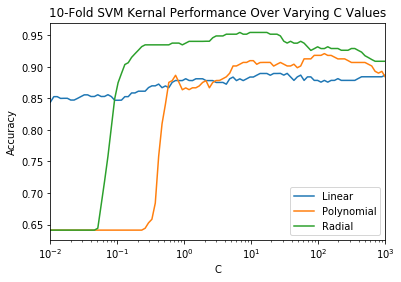

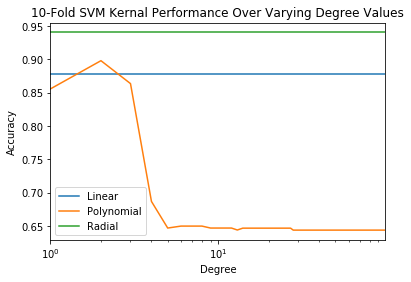

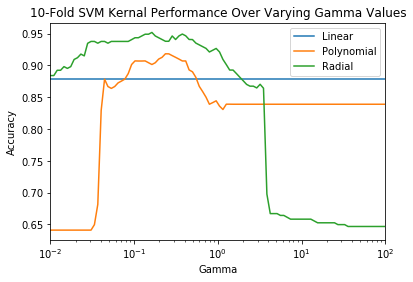

In [16]:
results = c_data.T

#Plot the results
plot = results.plot.line(title='10-Fold SVM Kernal Performance Over Varying C Values')
plot.set_xlabel("C")
plot.set_ylabel("Accuracy")
plot.set_xscale("log")
#Display plot in Jupyter
plot
fig = plot.get_figure()
fig.savefig("Q4_c_10.pdf")

results = degree_data.T
#Plot the results
plot = results.plot.line(title='10-Fold SVM Kernal Performance Over Varying Degree Values')
plot.set_xlabel("Degree")
plot.set_ylabel("Accuracy")
plot.set_xscale("log")
#Display plot in Jupyter
plot
fig = plot.get_figure()
fig.savefig("Q4_degree_10.pdf")

results = gamma_data.T
#Plot the results
plot = results.plot.line(title='10-Fold SVM Kernal Performance Over Varying Gamma Values')
plot.set_xlabel("Gamma")
plot.set_ylabel("Accuracy")
plot.set_xscale("log")
#Display plot in Jupyter
plot
fig = plot.get_figure()
fig.savefig("Q4_gamma_10.pdf")

